In [79]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot

In [80]:
df = pd.read_csv('preprocess_data.csv')

In [81]:
df= df[pd.to_numeric(df['rating'], errors='coerce').notnull()]

In [82]:
country_list = df['country'].value_counts()[0:20].index
country_list

Index(['USA', 'France', 'UK', 'India', 'Italy', 'Japan', 'Canada', 'Vietnam',
       'Germany', 'Spain', 'Australia', 'Hong Kong', 'Sweden', 'South Korea',
       'Turkey', 'Belgium', 'West Germany', 'Brazil', 'Denmark',
       'Netherlands'],
      dtype='object')

In [83]:
df['country'] = df.country.apply(lambda s: s if s in country_list else 'Others')

In [84]:
df['country']

0              USA
1        Australia
2          Germany
3           Canada
4           France
           ...    
85328    Australia
85329          USA
85330       Others
85331          USA
85332       Others
Name: country, Length: 84985, dtype: object

In [85]:
df['country'].value_counts()

Others          26584
USA             17693
France           5367
UK               4110
India            3781
Italy            3673
Japan            3304
Canada           2872
Vietnam          2396
Germany          1899
Spain            1463
Australia        1450
Hong Kong        1356
Sweden           1323
South Korea      1284
Turkey           1249
Belgium          1157
West Germany     1093
Brazil           1052
Denmark           991
Netherlands       888
Name: country, dtype: int64

<AxesSubplot:ylabel='country'>

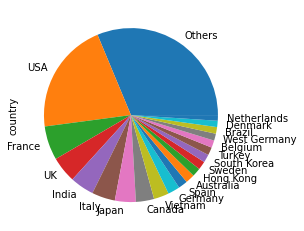

In [86]:
df.country.value_counts().plot(kind='pie')

In [87]:
df['rating'] = df['rating'].astype(float)
df['runtime'] = df['runtime'].astype(float)
# df['rating'] = df['rating'].astype(float)



In [88]:
df[(df["runtime"] > 400) & (df["kind"] == 'movie')] 

,title,year,rating,runtime,kind,color_info,sound_mix,director_name,genre,director_id,cast_names,cast_ids,votes,country,day,month
61,Les vampires,1915,7.3,421.0,movie,Black and White,Silent,Louis Feuillade,"['Action', 'Adventure', 'Crime', 'Drama', 'Mys...",275421.0,"[['Musidora', 'Édouard Mathé', 'Marcel Lévesqu...","[['0615736', '0559013', '0529695', '0043923', ...",4612,France,13,Nov
138,Tih Minh,1919,7.1,418.0,movie,Black and White,Silent,Louis Feuillade,"['Adventure', 'Mystery']",275421.0,"[['Mary Harald', 'René Cresté', 'Georges Bisco...","[['0361787', '0187612', '0083925', '0559013', ...",351,France,07,Feb
336,The Wheel,1923,7.5,417.0,movie,Black and White,Silent,Abel Gance,['Drama'],304098.0,"[['Gabriel de Gravone', 'Pierre Magnier', 'Geo...","[['0336414', '0536252', '0879412', '0786313', ...",2206,France,17,Feb
8749,Les vampires,1915,7.3,421.0,movie,Black and White,Silent,Louis Feuillade,"['Action', 'Adventure', 'Crime', 'Drama', 'Mys...",275421.0,"[['Musidora', 'Édouard Mathé', 'Marcel Lévesqu...","[['0615736', '0559013', '0529695', '0043923', ...",4613.0,France,13,Nov
13763,War and Peace,1966,8.3,422.0,movie,Color,Mono,Sergey Bondarchuk,"['Drama', 'History', 'Romance', 'War']",94083.0,"[['Sergey Bondarchuk', 'Lyudmila Saveleva', 'V...","[['0094083', '0767567', '0863146', '0952294', ...",6925,Others,14,Mar
17954,Hitler: A Film from Germany,1978,7.5,442.0,movie,Black and White,Mono,Hans-Jürgen Syberberg,"['Biography', 'Drama']",842944.0,"[['Heinz Schubert', 'Peter Kern', 'Hellmut Lan...","[['0775799', '0449489', '0486132', '0901901', ...",819.0,France,07,Jun
22162,The Satin Slipper,1986,6.8,410.0,movie,Color,Mono,Manoel de Oliveira,['Drama'],210701.0,"[['Luís Miguel Cintra', 'Patricia Barzyk', 'An...","[['0162502', '0059564', '0175931', '0310331', ...",176,France,08,Jan
28407,Satantango,1994,8.4,439.0,movie,Black and White,Mono,Béla Tarr,['Drama'],850601.0,"[['Mihály Vig', 'Putyi Horváth', 'László feLug...","[['0896902', '0395814', '0269841', '0022034', ...",10370,Others,28,Apr
37898,Out 1,2015,7.7,776.0,movie,Black and White,Mono,"Jacques Rivette_>, <Person id:0771535[http] na...","['Drama', 'Mystery']",729626.0,"[['Michèle Moretti', 'Hermine Karagheuz', 'Kar...","[['0604331', '0438751', '0969979', '0047623', ...",1316.0,France,18,Nov
39194,Khleb - imya sushchestvitelnoe,1988,5.9,580.0,movie,Color,NaN,Grigori Nikulin,"['Drama', 'History', 'Romance', 'War']",631987.0,"[['Nikolai Voloshin', 'Andrey Dudarenko', 'Ser...","[['1111892', '0240019', '0631963', '0750850', ...",162.0,Others,06,Oct


In [89]:
df['kind'].value_counts()

movie             82628
tv series          1543
tv movie            423
tv mini series      276
video movie          82
video game           17
episode               8
music video           3
podcast series        2
tv short              2
Name: kind, dtype: int64

Kiểm tra runtime các movie có thời lượng < 100', chủ yếu là tầm 100'

In [90]:
df_runtime = df[(df["runtime"] < 250) & (df["kind"] == 'movie')] 
# df_runtime

<AxesSubplot:ylabel='Frequency'>

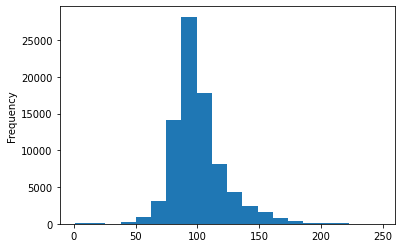

In [91]:
df_runtime.runtime.plot.hist(bins = 20)

Kiểm tra runtime các tv series có thời lượng < 100', chủ yếu là tầm 100'

<AxesSubplot:ylabel='Frequency'>

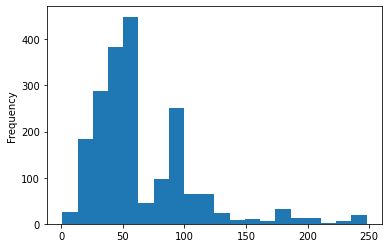

In [92]:
df_tv = df[(df["runtime"] < 250) & (df["kind"] != 'movie')] 
df_tv.runtime.plot.hist(bins = 20)

Có một vài movie có runtime lớn hơn 300'

<AxesSubplot:ylabel='Frequency'>

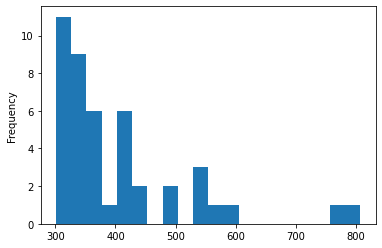

In [93]:
df_tv = df[(df["runtime"] > 300) & (df["kind"] == 'movie')] 
df_tv.runtime.plot.hist(bins = 20)

<AxesSubplot:xlabel='runtime', ylabel='rating'>

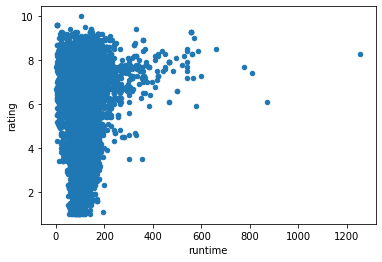

In [94]:
df.plot.scatter(x='runtime', y='rating')

Chỉ lấy movie có runtime < 250' <br>
Có thể thấy movie có thời lượng < 50 hoặc > 200 thì thường rating sẽ cao hơn

<AxesSubplot:xlabel='runtime', ylabel='rating'>

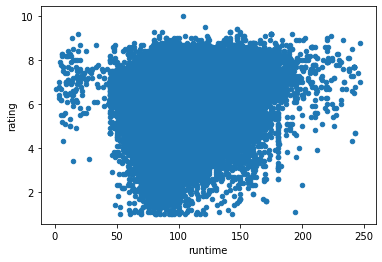

In [95]:
df_runtime.plot.scatter(x='runtime', y='rating')

Lấy tv series có runtime > 250

<AxesSubplot:xlabel='runtime', ylabel='rating'>

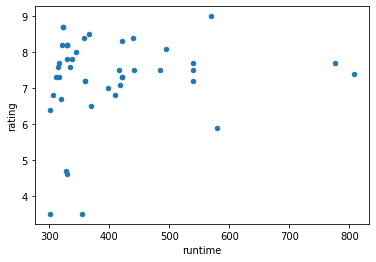

In [96]:
df_tv.plot.scatter(x='runtime', y='rating')

Kiểm tra rating qua các năm

In [97]:
year_rating = df[['year', 'rating']]
year_rating = year_rating[pd.to_numeric(year_rating['year'], errors='coerce').notnull()]
# year_rating['year'] = pd.DatetimeIndex(year_rating['year']).year

# year_rating['year'] = year_rating['year'].astype(float)
year_rating


,year,rating
0,1894,5.9
1,1906,6.1
2,1911,5.9
3,1963,7.0
4,1994,7.1
...,...,...
85328,2019,4.8
85329,2017,6.2
85330,2018,8.4
85331,2020,4.6


In [98]:
year_rating['year'].value_counts()

2018    2907
2017    2802
2019    2752
2016    2623
2015    2448
        ... 
1911       2
1895       1
1894       1
1906       1
1902       1
Name: year, Length: 116, dtype: int64

In [99]:
plot_year_rating = year_rating.groupby(['year']).mean().reset_index()
plot_year_rating['year'] = plot_year_rating['year'].astype(int)
plot_year_rating['year'] = plot_year_rating.year.apply(lambda s: s//10*10)

Chia thành từng thập kỉ, thấy rating có vẻ đồng đều

<AxesSubplot:ylabel='year'>

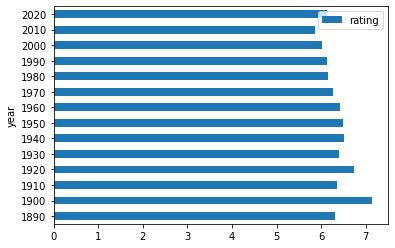

In [100]:
real_plot_year_rating = plot_year_rating.groupby(['year']).mean().reset_index()
real_plot_year_rating.plot.barh(x='year',y='rating',rot=0)


Kiểm tra tương quan lượng phim đen trắng và phim màu

<AxesSubplot:ylabel='color_info'>

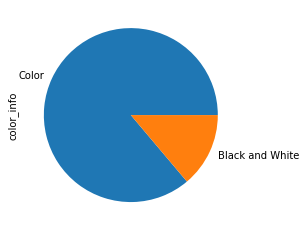

In [101]:
df.color_info.value_counts().plot(kind='pie')

Rating của phim đen trắng nhỉnh hơn một chút

<AxesSubplot:xlabel='color_info'>

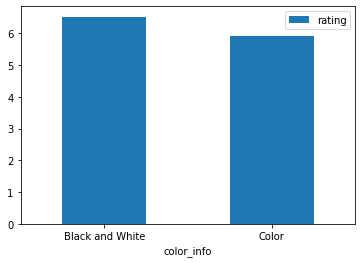

In [102]:
rating_color = df[['rating', 'color_info']]
mean_color = rating_color.groupby(['color_info']).mean().reset_index()
mean_color.plot.bar(x='color_info',y='rating',rot=0)

Kiểm tra số lượng phim đen trắng và phim màu qua từng năm, xem sự thay đổi qua thời gian

In [103]:
color = df[['year', 'color_info']]

<AxesSubplot:title={'center':'Black and White movie over time'}>

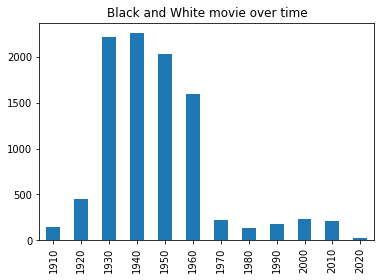

In [104]:
color_black = color[color['color_info'] == 'Black and White']
color_black = color_black[pd.to_numeric(color_black['year'], errors='coerce').notnull()]
color_black['year'] = color_black['year'].astype(int)
color_black['year'] = color_black.year.apply(lambda s: s//10*10)
color_black = color_black[color_black['year'] >= 1910]
color_black['year'].value_counts().sort_index().plot(kind='bar', title='Black and White movie over time')

<AxesSubplot:title={'center':'Color movie over time'}>

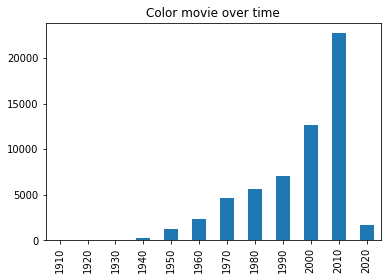

In [105]:
color_color = color[color['color_info'] == 'Color']
color_color = color_color[pd.to_numeric(color_color['year'], errors='coerce').notnull()]
color_color['year'] = color_color['year'].astype(int)
color_color['year'] = color_color.year.apply(lambda s: s//10*10)
# color_black['year']
color_color['year'].value_counts().sort_index().plot(kind='bar', title='Color movie over time')

In [106]:
# color_black['year'].value_counts().sort_index()
# color_black
black = color_black['year'].value_counts().sort_index().rename_axis('year').reset_index(name='Black_Count')
color = color_color['year'].value_counts().sort_index().rename_axis('year').reset_index(name='Color_Count')
color['Black_Count'] = black['Black_Count']
color.set_index('year', inplace=True)

color

,Color_Count,Black_Count
year,,
1910,4,143
1920,17,446
1930,56,2215
1940,245,2254
1950,1254,2034
1960,2365,1595
1970,4613,219
1980,5608,136
1990,7045,181


<AxesSubplot:xlabel='year'>

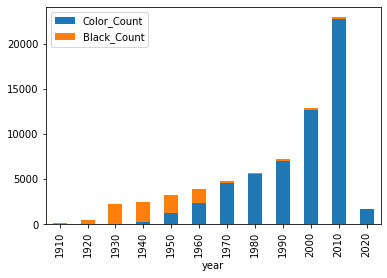

In [107]:
color.plot.bar(stacked=True)

Kiểm tra âm thanh qua các năm

In [108]:
def change(s):
    if s == 'DTS':
        s = 'Others'
    return s
df['sound_mix'] = df.sound_mix.apply(change)

<AxesSubplot:ylabel='sound_mix'>

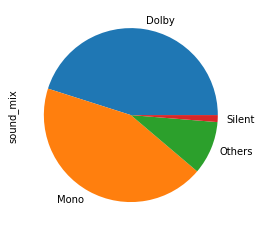

In [109]:
df.sound_mix.value_counts().plot(kind='pie')

Có thể thấy rating của phim không tiếng cao hơn

<AxesSubplot:xlabel='sound_mix'>

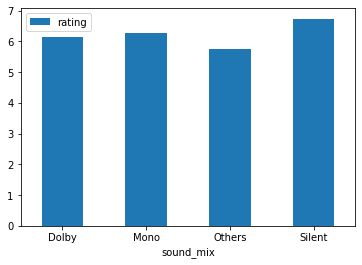

In [110]:
rating_sound = df[['rating', 'sound_mix']]
mean_sound = rating_sound.groupby(['sound_mix']).mean().reset_index()
mean_sound.plot.bar(x='sound_mix',y='rating',rot=0)

In [111]:
sound = df[['year', 'sound_mix']]

<AxesSubplot:title={'center':'Silent movie'}>

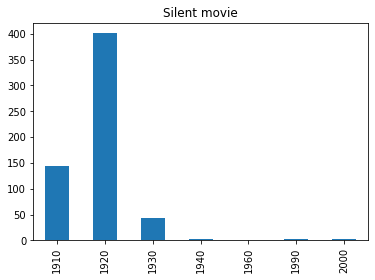

In [112]:
sound_silent = sound[sound['sound_mix'] == 'Silent']
sound_silent = sound_silent[pd.to_numeric(sound_silent['year'], errors='coerce').notnull()]
sound_silent['year'] = sound_silent['year'].astype(int)
sound_silent['year'] = sound_silent.year.apply(lambda s: s//10*10)
sound_silent = sound_silent[sound_silent['year'] >= 1910]
sound_silent['year'].value_counts().sort_index().plot(kind='bar', title='Silent movie')

<AxesSubplot:title={'center':'Mono movie'}>

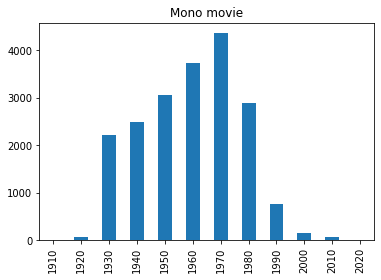

In [113]:
sound_mono = sound[sound['sound_mix'] == 'Mono']
sound_mono = sound_mono[pd.to_numeric(sound_mono['year'], errors='coerce').notnull()]
sound_mono['year'] = sound_mono['year'].astype(int)
sound_mono['year'] = sound_mono.year.apply(lambda s: s//10*10)
sound_mono = sound_mono[sound_mono['year'] >= 1910]
sound_mono['year'].value_counts().sort_index().plot(kind='bar', title='Mono movie')

<AxesSubplot:title={'center':'Dolby movie'}>

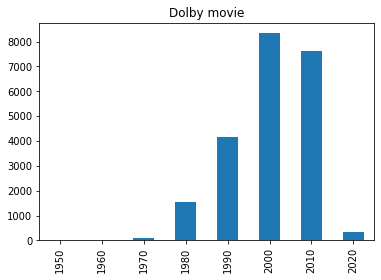

In [114]:
SOUND_dolby = sound[sound['sound_mix'] == 'Dolby']
SOUND_dolby = SOUND_dolby[pd.to_numeric(SOUND_dolby['year'], errors='coerce').notnull()]
SOUND_dolby['year'] = SOUND_dolby['year'].astype(int)
SOUND_dolby['year'] = SOUND_dolby.year.apply(lambda s: s//10*10)
SOUND_dolby = SOUND_dolby[SOUND_dolby['year'] >= 1910]
SOUND_dolby['year'].value_counts().sort_index().plot(kind='bar',title='Dolby movie')

In [115]:
silent = sound_silent['year'].value_counts().sort_index().rename_axis('year').reset_index(name='Silent')
mono = sound_mono['year'].value_counts().sort_index().rename_axis('year').reset_index(name='Mono')
dolby = SOUND_dolby['year'].value_counts().sort_index().rename_axis('year').reset_index(name='Dolby')

silent.set_index('year', inplace=True)
mono.set_index('year', inplace=True)
dolby.set_index('year', inplace=True)

sound_all = mono
sound_all = sound_all.join(silent)
sound_all = sound_all.join(dolby)
sound_all

,Mono,Silent,Dolby
year,,,
1910,3,144.0,NaN
1920,62,401.0,NaN
1930,2210,44.0,NaN
1940,2486,2.0,NaN
1950,3062,NaN,5.0
1960,3727,1.0,7.0
1970,4360,NaN,85.0
1980,2901,NaN,1547.0
1990,767,2.0,4145.0


Nhận xét xu hướng phim bắt đầu có tiếng vào thập kỉ 1930, và từ mono thành dolby bắt đầu từ thập kỉ 1980 (dobly sound bắt đầu từ 1976)

<AxesSubplot:xlabel='year'>

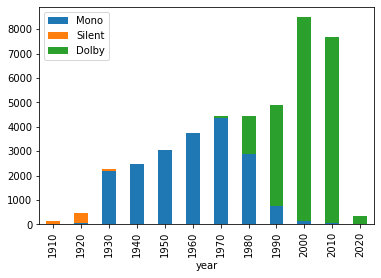

In [116]:
sound_all.plot.bar(stacked=True)